In [49]:
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame

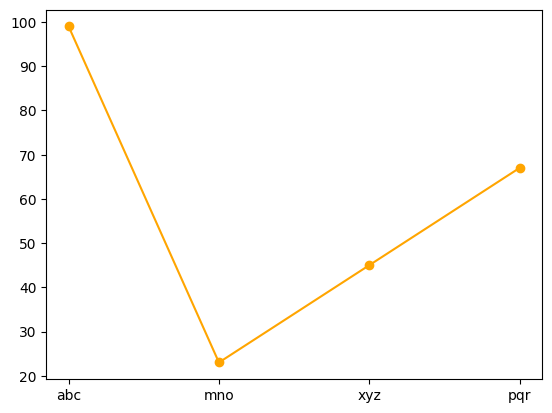

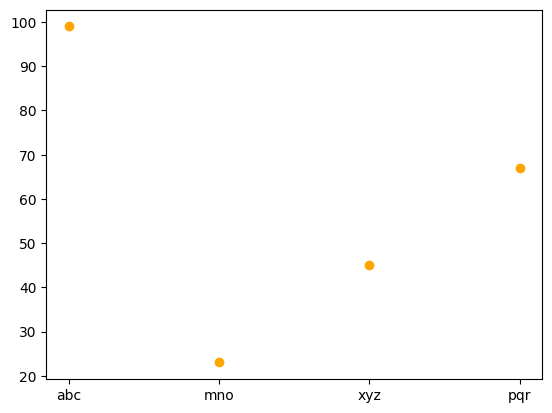

In [14]:
empname = ['abc','mno','xyz','pqr']
salary = [99,23,45,67]
plt.plot(empname,salary,marker='o',color = "orange")
plt.show()
plt.scatter(empname,salary,marker='o',color = "orange")
plt.show()

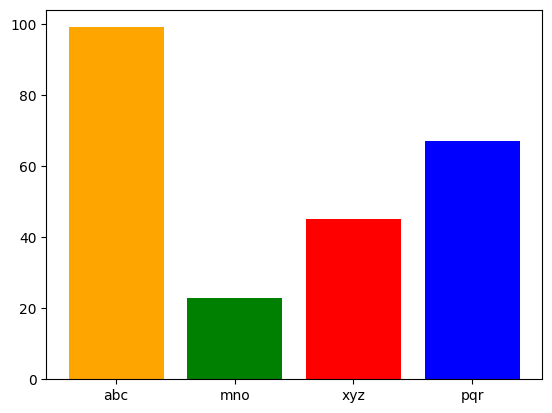

In [15]:
plt.bar(empname,salary,color = ["orange","green","red","blue"])
plt.show()

## Movies Analysis, visual

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/popular-movies-datasets-58000-movies")

print("Path to dataset files:", path)

D:\DAIAugust2025\Python\Pankaj\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 272M/272M [00:19<00:00, 14.4MB/s] 

Extracting files...


Path to dataset files: C:\Users\dai\.cache\kagglehub\datasets\whenamancodes\popular-movies-datasets-58000-movies\versions\1


In [43]:
movie =pd.read_csv("C:\\Users\\dai\\.cache\\kagglehub\\datasets\\whenamancodes\\popular-movies-datasets-58000-movies\\versions\\1\\movies.csv")
movie_ratings =pd.read_csv("C:\\Users\\dai\\.cache\\kagglehub\\datasets\\whenamancodes\\popular-movies-datasets-58000-movies\\versions\\1\\ratings.csv")
movie_tags = pd.read_csv("C:\\Users\\dai\\.cache\\kagglehub\\datasets\\whenamancodes\\popular-movies-datasets-58000-movies\\versions\\1\\tags.csv")

In [44]:
print(movie.head())
print(movie_ratings.head())
print(movie_tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
   userId  movieId           tag   timestamp
0      14      110          epic  1443148538
1      14      110      Medieval  1443148532
2      14      260        sci-fi  14

In [52]:
movie_genres = movie['genres'].str.split('|').explode().reset_index()
movie_genres.columns = ['movieId','genre']
movie_genres

,movieId,genre
0,0,Adventure
1,0,Animation
2,0,Children
3,0,Comedy
4,0,Fantasy
...,...,...
106102,58096,Horror
106103,58096,Sci-Fi
106104,58097,Action
106105,58097,Crime


#cleaning

In [60]:
print((movie.isna() | (movie =='')).sum())
print((movie_genres.isna() | (movie_genres =='')).sum())
print((movie_ratings.isna() | (movie_ratings =='')).sum())

movieId    0
title      0
genres     0
dtype: int64
movieId    0
genre      0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


#visualisation

In [74]:
genrewise_count = pd.DataFrame(movie_genres.groupby('genre')['movieId'].count())
genrewise_count.rename(columns={'movieId':'count_movie'})
print(genrewise_count)

                    movieId
genre                      
(no genres listed)     4266
Action                 7130
Adventure              4067
Animation              2663
Children               2749
Comedy                15956
Crime                  5105
Documentary            5118
Drama                 24144
Fantasy                2637
Film-Noir               364
Horror                 5555
IMAX                    197
Musical                1113
Mystery                2773
Romance                7412
Sci-Fi                 3444
Thriller               8216
War                    1820
Western                1378


In [69]:
plt.bar(genrewise_count.get_gr,genrewise_count[1])

AttributeError: 'Series' object has no attribute 'get_group'